In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('games_data_2fixx.csv')
X = dataset.iloc[:,[2,6]].values
Y = dataset.iloc[:,-1].values

In [17]:
dataset_baru = dataset.loc[:,['game','score','gamers','rating','recommend to play']]
dataset_baru

,game,score,gamers,rating,recommend to play
0,A Boy and His Blob,638,2194,3.2,recommended
1,A Hat in Time,1992,7062,4.2,recommended
2,A Hero and a Garden,1364,503,5.0,recommended
3,A Hero and a Garden (EU),1363,581,2.9,not recommended
4,A King's Tale: Final Fantasy XV,637,21914,3.3,recommended
...,...,...,...,...,...
1579,36 Fragments of Midnight,1367,8472,2.5,not recommended
1580,36 Fragments of Midnight (Asia),1335,2131,2.4,not recommended
1581,36 Fragments of Midnight (EU),1382,12273,2.4,not recommended
1582,428: Shibuya Scramble,1943,916,4.2,recommended


Importing dataset

In [18]:
print(X)
print(Y)

[[ 638.     3.2]
 [1992.     4.2]
 [1364.     5. ]
 ...
 [1382.     2.4]
 [1943.     4.2]
 [1917.     4.2]]
['recommended' 'recommended' 'recommended' ... 'not recommended'
 'recommended' 'recommended']


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_baru['recommend to play'] = le.fit_transform(dataset['recommend to play'].values)
y = le.fit_transform(Y)
print(dataset_baru)
print(y)

                                 game  score  gamers  rating  \
0                  A Boy and His Blob    638    2194     3.2   
1                       A Hat in Time   1992    7062     4.2   
2                 A Hero and a Garden   1364     503     5.0   
3            A Hero and a Garden (EU)   1363     581     2.9   
4     A King's Tale: Final Fantasy XV    637   21914     3.3   
...                               ...    ...     ...     ...   
1579         36 Fragments of Midnight   1367    8472     2.5   
1580  36 Fragments of Midnight (Asia)   1335    2131     2.4   
1581    36 Fragments of Midnight (EU)   1382   12273     2.4   
1582            428: Shibuya Scramble   1943     916     4.2   
1583       428: Shibuya Scramble (EU)   1917     718     4.2   

      recommend to play  
0                     1  
1                     1  
2                     1  
3                     0  
4                     1  
...                 ...  
1579                  0  
1580                  0

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Trainin the kkn model 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

prediction teh test

In [23]:
y_pred = classifier.predict(X_test)

making the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[163   3]
 [  0 230]]


visualising the training set result

<ipython-input-25-16e0925c2a40>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


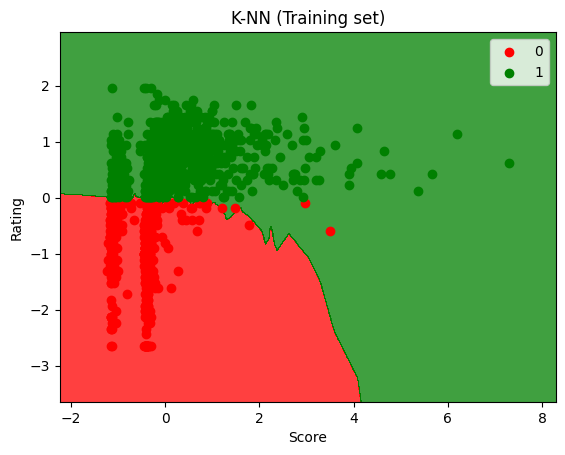

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Score')
plt.ylabel('Rating')
plt.legend()
plt.show()

Visualising the Test set results

<ipython-input-26-cb03da9f2e2d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


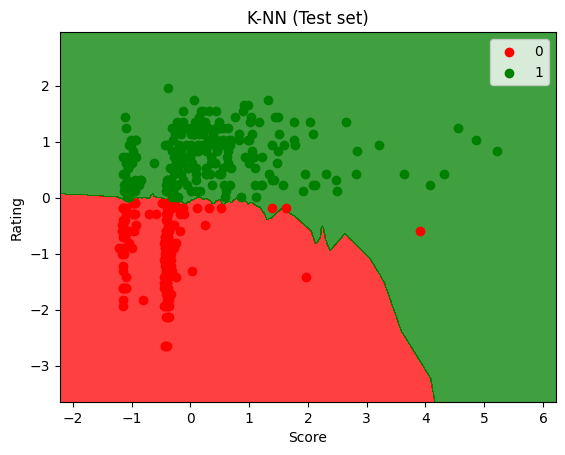

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Score')
plt.ylabel('Rating')
plt.legend()
plt.show()